# **Linear Regression**: Human Brain Weight

This dataset was compiled using a medical study conducted on a group of people. This dataset shows a few variations of head sizes and masses of brains, it also consists additional gender and age group columns. The goal of the study is to predict the masses of the brains using the data, and later compare it with the actual masses of brains 

# **Exploratory Data Analysis (EDA)**
 1. Libraries
 2. Dataset
 2. Data Preprocessing
 4. Exploratory Data Analysis (EDA)

## **1.** Settings

In [5]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

## **2.** Dataset

'''
    DATASET INFO

    |--------------|------------|-------|--------------------------------------------------------------|
    | Name         | Data Type  | Meas. | Description                                                  |
    |--------------|------------|-------|--------------------------------------------------------------|
    | Gender       | nominal    |       | 1 represents Male, 2 represents Female                       |
    | Age Range    | nominal    |       | 1 represents >18 years of age, 2 represents <18 years of age |
    | Head Size    | continuous | cm^3  | Head volume                                                  |
    | Brain Weight | continuous | grams | Mass of brains                                               |
    |--------------|------------|-------|--------------------------------------------------------------|  

'''

In [8]:
# import the dataset
data = pd.read_csv('./dataset.csv')
data.sample(5)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
26,1,1,4036,1490
95,1,2,3779,1165
45,1,1,4034,1422
201,2,2,3228,1235
177,2,1,3561,1127


In [9]:
data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [10]:
data.columns = ['Gender', 'Age Range', 'Head Size', 'Brain Weight']
data.columns

Index(['Gender', 'Age Range', 'Head Size', 'Brain Weight'], dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        237 non-null    int64
 1   Age Range     237 non-null    int64
 2   Head Size     237 non-null    int64
 3   Brain Weight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


## **3.** Data Preprocessing

In [13]:
# check null values
data.isnull().sum()

Gender          0
Age Range       0
Head Size       0
Brain Weight    0
dtype: int64

There are no missing values in this dataset.

## **4.** Exploratory Data Analysis (EDA)

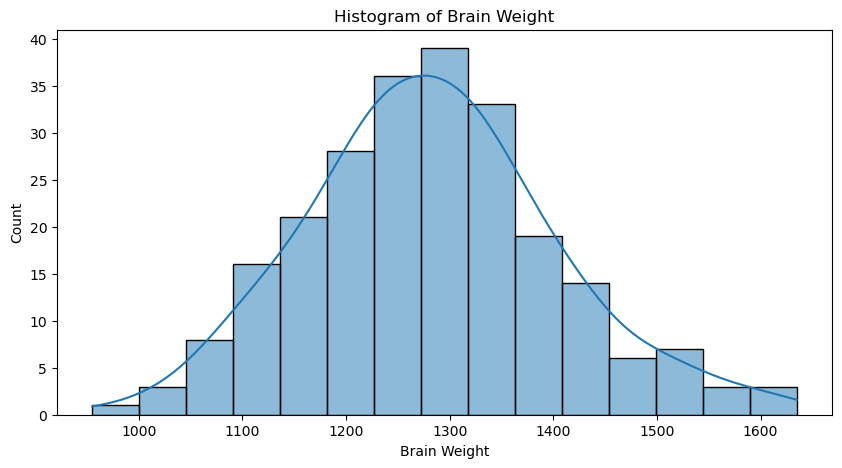

In [106]:
# Histogram of the dataset
plt.figure(figsize=(10,5))
plt.title('Histogram of Brain Weight')
sns.histplot(data=data, x='Brain Weight', kde=True, bins=15);
plt.show()

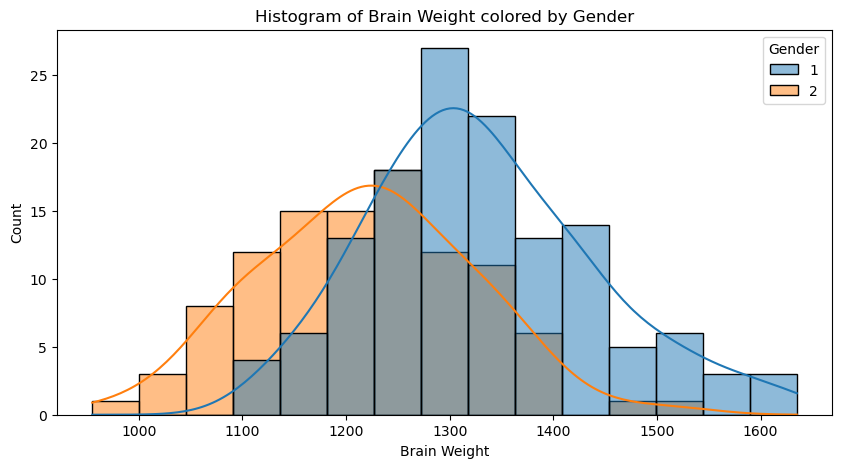

In [17]:
# Histogram of the target coloured by gender
plt.figure(figsize=(10,5))
plt.title('Histogram of Brain Weight colored by Gender')
sns.histplot(data=data, x='Brain Weight', hue='Gender', kde=True, bins=15, palette='tab10');

Males seem to have (slightly) heavier brains than females.

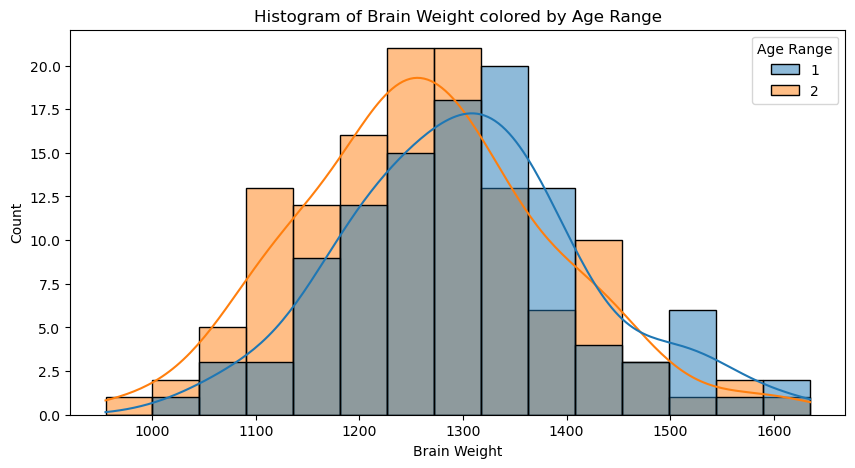

In [19]:
# Histogram of the target, colored by 'Age Range'
plt.figure(figsize=(10,5))
plt.title('Histogram of Brain Weight colored by Age Range')
sns.histplot(data=data, x='Brain Weight', hue='Age Range', kde=True, bins=15, palette='tab10');

18-years and above might have (slightly) heavier brains.

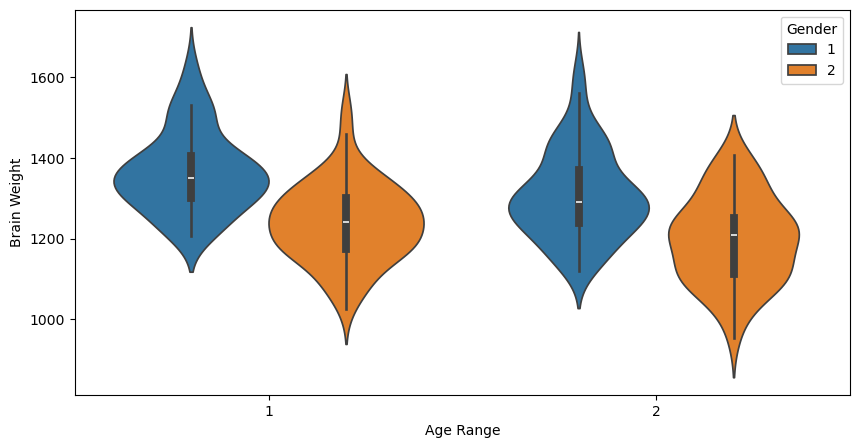

In [21]:
# Violinplot of thhe target, withh focus on both 'Gender' and 'Age Range'
plt.figure(figsize=(10,5))
sns.violinplot(data=data, x='Age Range', y='Brain Weight', hue='Gender', palette='tab10')
plt.show()

Again (seen with a mixed-effects perspective), it seems that 18 years and above have (slightly) heavier brains.
Moreover, again, males have (slightly) heavier brains than females.

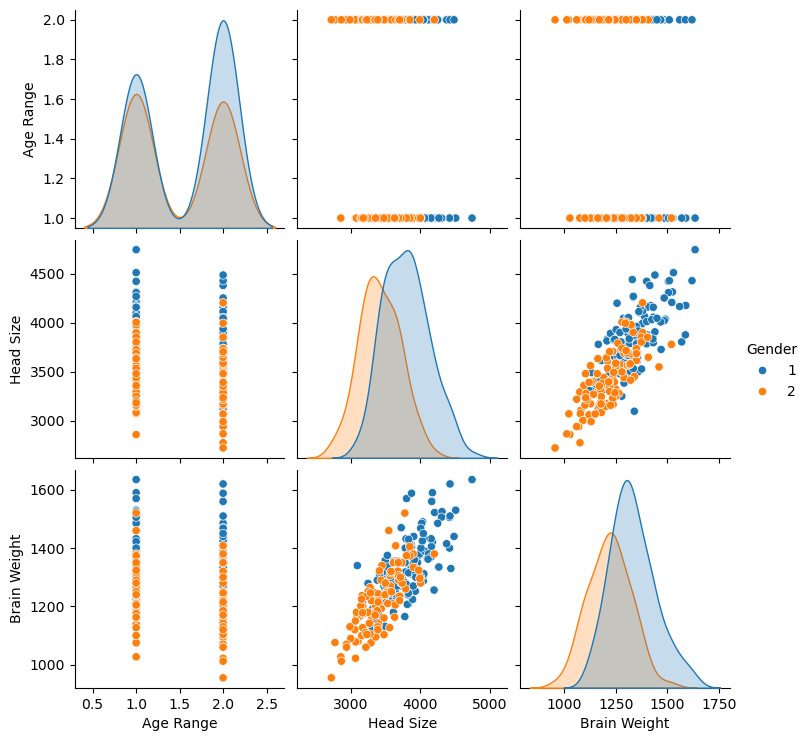

In [23]:
# Pairplot colored by 'Gender'
sns.pairplot(data, hue='Gender', palette='tab10');

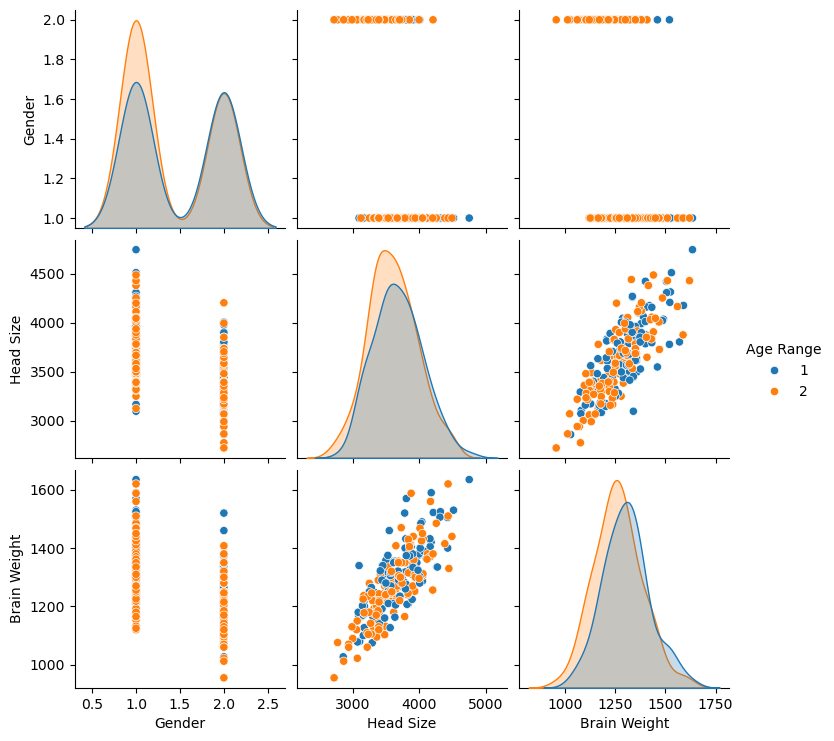

In [24]:
# Pairplot colored by 'Age Range'
sns.pairplot(data, hue='Age Range', palette='tab10');

# **Feature Selection**
 1. Data Preprocessing
 2. Feature Selection

## **1.** Feature Selection

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        237 non-null    int64
 1   Age Range     237 non-null    int64
 2   Head Size     237 non-null    int64
 3   Brain Weight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


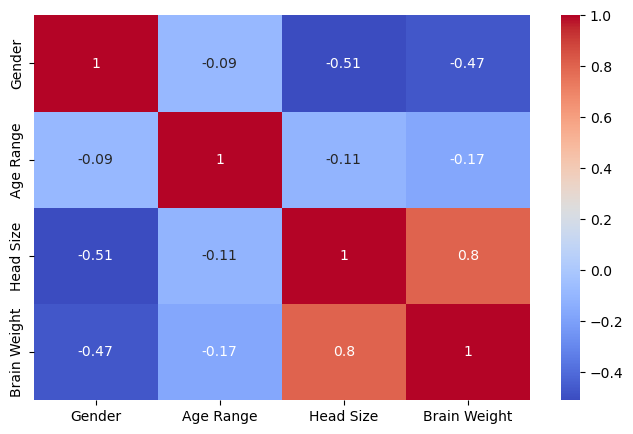

In [28]:
# Correllation matrix
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(8,5))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation coefficient ranges from -1 to 1:

if the value is close to 1 there is a strong positive correlation between the two variables
if the value is close to -1, the variables have a strong negative correlation
To fit a linear regression model, we select those features which have a high correlation with our target variable.
An important point in selecting features for a linear regression model is to check for multi-co-linearity.

By looking at the correlation matrix we can see that the variable that is most correlated with the target (which in this case is 'Brain Weight') is 'Head Size' (0.8). The other variables are not strongly correlated with the target variable, but perhaps they are worth including in the training model. It is good that the variables are not correlated with each other: we should avoid selecting the features that are (highly) correlated together.

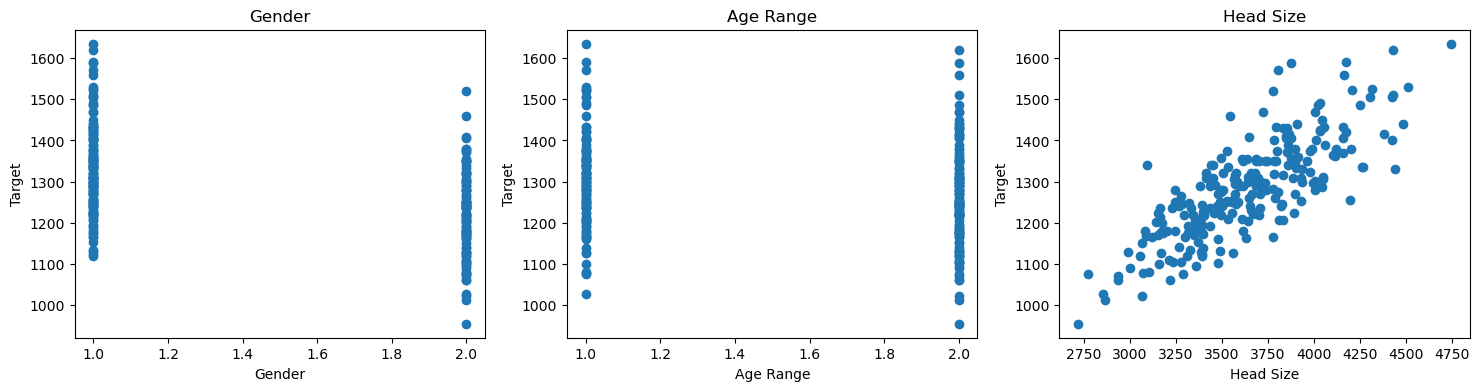

In [30]:
# Scatterplot of the features
# Using a scatter plot let’s see how these features vary with 'Brain Weight'
plt.figure(figsize=(18, 4))

features = ['Gender', 'Age Range', 'Head Size']
target = data['Brain Weight']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Target')

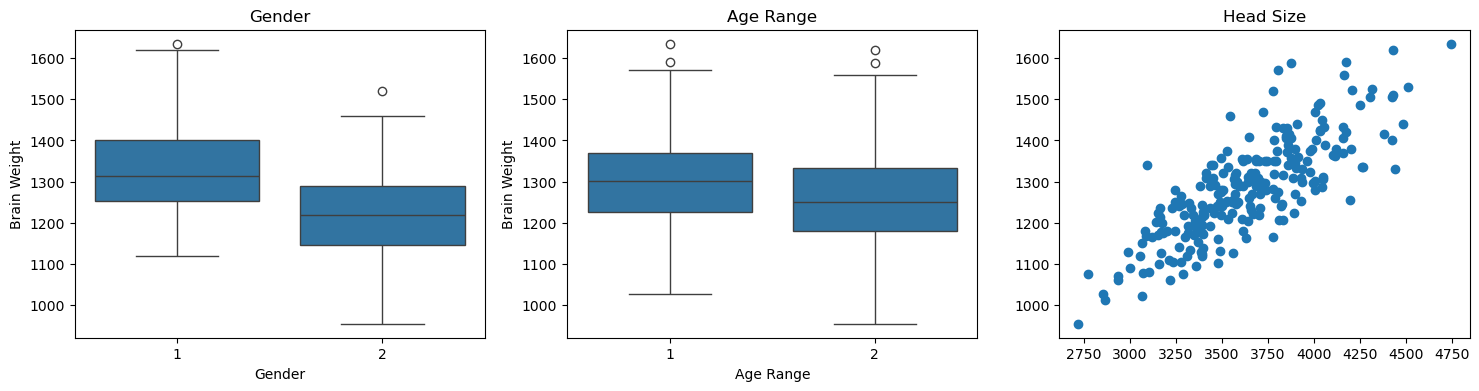

In [31]:
# It is better to consider the scatterplot only for continuous variables, 
# for categorical variables we consider a boxplot

plt.figure(figsize=(18, 4))

# Categorical
plt.subplot(1, 3, 1)
sns.boxplot(x=data['Gender'], y=target);
plt.title('Gender');

# Categorical
plt.subplot(1, 3, 2)
sns.boxplot(x=data['Age Range'], y=target);
plt.title('Age Range');

# Continuous
plt.subplot(1, 3, 3)
plt.scatter(x=data['Head Size'], y=target, marker='o');
plt.title('Head Size');

**Insights**

* It seems that gender can make some difference
* The age range does not seem to have too much of an effect on its own (as even the confusion matrix suggests), perhaps, however, interaction with the other variables may give effect (as seen in the EDA notebook)
* The brain weight increase as the value of the head size increases linearly (it looks to be following exactly a linear line)

# **Linear Regression with Scikit-Learn**
 1. Libraries
 2. Data Preparation
 4. Training the Modle

## **1.** Libraries

In [35]:
# Libraries
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Warnings off
import warnings
warnings.filterwarnings("ignore")

## **2.** Data Preparation

In [37]:
X = data[['Gender', 'Age Range', 'Head Size']]
Y = data['Brain Weight']

In [38]:
X.dtypes

Gender       int64
Age Range    int64
Head Size    int64
dtype: object

The 'Age Range' and the 'Gender' are not numbers that should be considered as numbers, they are categories and should therefore be dummies-converted. Actually for'Age Range' we can apply an Ordinal-Encoding (since it makes sense to give growth meaning), while for 'Gender' we apply a One-Hot-Encoder.

### One-Hot-Encoding

In [41]:
## ONE-HOT-ENCODING: 'Gender'

# Encoding
gender_encoded = OneHotEncoder().fit_transform(X[['Gender']]);

# Transform in a DataFrame
gender_encoded = pd.DataFrame(gender_encoded.toarray()).astype(int)

# Show results
gender_encoded.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [42]:
# Compare with associated values
X['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [43]:
# We can conclude:
#   1 -> Male   -> [1, 0]
#   2 -> Female -> [0, 1]

gender_encoded.columns = ['Male', 'Female']
gender_encoded

,Male,Female
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
232,0,1
233,0,1
234,0,1
235,0,1


### Ordinal-Encoding

In [45]:
## ORDINAL-ENCODING: 'Age Range' 

# Encoding
age_encoded = OrdinalEncoder().fit_transform(X[['Age Range']]);

# Transform in a DataFrame
age_encoded = pd.DataFrame(age_encoded).astype(int)

# Show results
age_encoded.head()

,0
0,0
1,0
2,0
3,0
4,0


In [46]:
# Perform a replacement to have: 0 == <18, 1 == >18
age_encoded = age_encoded.replace({0:1, 1:0})
age_encoded.head()

,0
0,1
1,1
2,1
3,1
4,1


In [47]:
# What is the association?
X['Age Range'].head()

0    1
1    1
2    1
3    1
4    1
Name: Age Range, dtype: int64

In [48]:
# It is possible to conclude:
#   1 -> >18 -> 1
#   2 -> <18 -> 0

###  Update dataframe

In [50]:
# Add 'Gender' encoded
X = pd.concat([X, gender_encoded], axis=1)

# Drop the old 'Gender'  
X = X.drop('Gender', axis=1) 

# Substitute 'Age Range' with 'age_encoded'
X['Age Range'] = age_encoded

# Check
X

,Age Range,Head Size,Male,Female
0,1,4512,1,0
1,1,3738,1,0
2,1,4261,1,0
3,1,3777,1,0
4,1,4177,1,0
...,...,...,...,...
232,0,3214,0,1
233,0,3394,0,1
234,0,3233,0,1
235,0,3352,0,1


### Split in train and validation

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(189, 4)
(48, 4)
(189,)
(48,)


## **3.** Modle Training

In [54]:
# Define models
models = {
    'Linear'     : LinearRegression(),
    'Ridge'      : Ridge(),
    'Lasso'      : Lasso(),
    'ElasticNet' : ElasticNet()}

In [55]:
def train_models(models, X_train, X_test, Y_train, Y_test):

    np.random.seed(42)

    count_models = 0 

    for name, model in models.items():

        # Training/Fitting
        model.fit(X_train, Y_train)

        # Predictions (on the training set)
        Y_pred_train = model.predict(X_train)
       
        # Metrics
        model_train_score = model.score(X_train, Y_train)
        model_test_score  = model.score(X_test, Y_test)
        model_mse         = mean_squared_error(Y_train, Y_pred_train)
        model_rmse        = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
        model_mae         = mean_absolute_error(Y_train, Y_pred_train)
        model_r2          = r2_score(Y_train, Y_pred_train)

        # If this is the first model trained we create the DataFrame 'results'
        if count_models == 0:
            results = pd.DataFrame([
                model_train_score, 
                model_test_score, 
                model_mse, 
                model_rmse, 
                model_mae, 
                model_r2],
                index = ['Train Accuracy', 'Test Accuracy', 'MSE', 'RMSE', 'MAE', 'R2'],
                columns = [name])

        # otherwise we just append the results to the already-existsing DataFrame 'results'
        else:
            results[name] = [
                model_train_score, 
                model_test_score, 
                model_mse, 
                model_rmse, 
                model_mae, 
                model_r2]

        count_models += 1
        
    print(f'Trained {count_models} models')

    return results.T

In [56]:
results = train_models(models, X_train, X_test, Y_train, Y_test)

Trained 4 models


In [57]:
# Overall results
results

,Train Accuracy,Test Accuracy,MSE,RMSE,MAE,R2
Linear,0.614110,0.776742,5403.786805,73.510454,57.113235,0.614110
Ridge,0.614105,0.776455,5403.858223,73.510939,57.101169,0.614105
Lasso,0.613298,0.770211,5415.164016,73.587798,56.962264,0.613298
ElasticNet,0.608830,0.762208,5477.733661,74.011713,57.154729,0.608830


In [58]:
metrics_to_maximize = ['Train Accuracy', 'Test Accuracy', 'R2']
metrics_to_minimize = ['MSE', 'RMSE', 'MAE']

print('Metrics to maximize: ')
results[metrics_to_maximize].style.highlight_max(color= 'lightgreen', axis=0)

Metrics to maximize: 


,Train Accuracy,Test Accuracy,R2
Linear,0.614110,0.776742,0.614110
Ridge,0.614105,0.776455,0.614105
Lasso,0.613298,0.770211,0.613298
ElasticNet,0.608830,0.762208,0.608830


In [59]:
print('Metrics to minimize: ')
results[metrics_to_minimize].style.highlight_min(color='grey', axis=0)

Metrics to minimize: 


,MSE,RMSE,MAE
Linear,5403.786805,73.510454,57.113235
Ridge,5403.858223,73.510939,57.101169
Lasso,5415.164016,73.587798,56.962264
ElasticNet,5477.733661,74.011713,57.154729


###  Model evaluation

Overall, the linear model is the best.

In [62]:
# Training of the model
model = LinearRegression()
model.fit(X_train, Y_train);

In [63]:
# Coefficients analysis

coefficients = {}

# Save the coefficients
for i in range(len(model.coef_)):
    coefficients[X.columns[i]] = model.coef_[i]

# Add the intercept
coefficients['Intercept'] = model.intercept_

In [64]:
coefficients_dataframe = pd.DataFrame(coefficients.values()).T
coefficients_dataframe.columns = coefficients.keys()
coefficients_dataframe

,Age Range,Head Size,Male,Female,Intercept
0,22.562647,0.242566,7.104745,-7.104745,393.024595


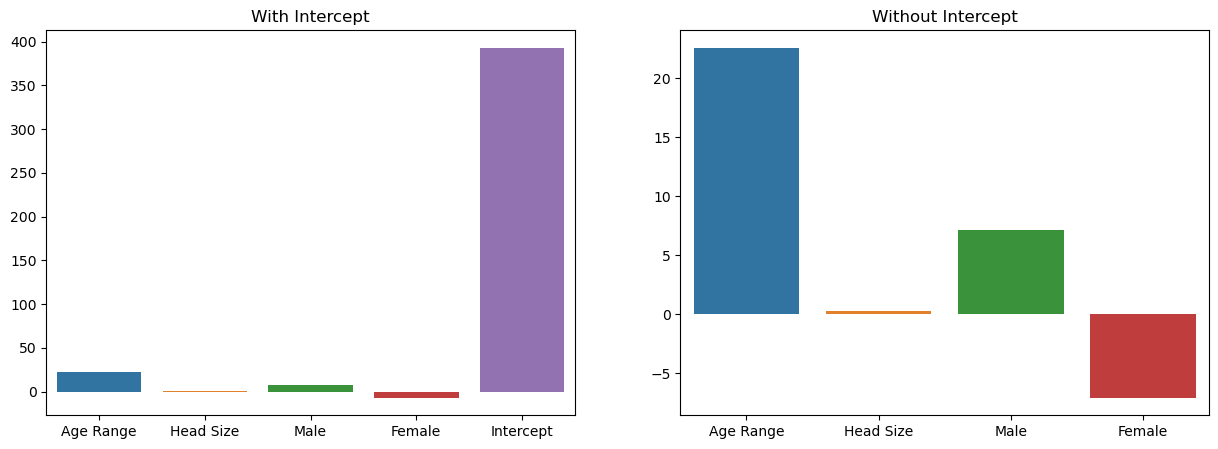

In [65]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.barplot(data = coefficients_dataframe);
plt.title('With Intercept');

plt.subplot(1,2,2)
sns.barplot(data = coefficients_dataframe[['Age Range', 'Head Size', 'Male', 'Female']]);
plt.title('Without Intercept');

In [66]:
# Evaluation
Y_pred_train = model.predict(X_train)

# Metrics
r2          = r2_score(Y_train, Y_pred_train)
mae         = mean_absolute_error(Y_train, Y_pred_train)
mse         = mean_squared_error(Y_train, Y_pred_train)
rmse        = np.sqrt(mse)
score_train = model.score(X_train, Y_train)
score_test  = model.score(X_test, Y_test)

print(f'R2 Score: {r2}')
print(f'Training Accuracy: {score_train}')
print(f'Test Accuracy: {score_test}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')

R2 Score: 0.6141102935912989
Training Accuracy: 0.6141102935912989
Test Accuracy: 0.7767424819420188
Mean Absolute Error: 57.11323529480087
Mean Square Error: 5403.7868046410385
Root Mean Square Error: 73.51045370993869
